In [85]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'dql_const'
run_name = 'state_of_art'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [86]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 0.8
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type dql
gamma 1.0
episodes 1000.0
eta0 0.0001
eta_decay_start 500000.0
eta_decay_rate 0.9
eta_c 1.0
eps0 0.01
eps_decay_start 500000.0
eps_decay_rate 1.3
eps_c 1.0
optimizer adam
loss huber
max_power 0.0


In [87]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[   65  1565  2944  2976  3007  3489  3578  3582  3592  3601  3964  3966
  3981  4501  4514  4516  5913  6225  6239  6249  6266  6332  6471  6493
  6543  6867  6877  6881  6938  6969  6971  6973  7181  7201  7520  7691
  7734  8846  8849  8864  8878  9647  9665 11165 11325 11498 12998 14476
 14504 14519 14626 14642 14658 14660 14748 14763 14774 14803 14810 14820
 14833 15801 15851 16780 16791 16793 17857 19261 19297 19313 19418 19432
 19448 19469 20817 20827 20831 20900 20943 20953 20993 21046 21263 22639
 22662 22664 22676 22895 22958 22977 23155 24655 26155 27523 27550 27565
 27580 27591 27604 27651 27700 27704 28061 28111 28479 28498 28520 28565
 28933 30433 30754 30807 31211 31250 31334 31371 31399 31430 31650 31660
 31662 31665 32171 32173 32184 32234 32272 32335 32346 32356 33856 33884
 33969 33984 33997 34013 34021 34024 34518 34547 34567 34582 34592 34601
 34614 34686 34698 34709 34779 34793 34805 34815 34831 34854 34866 34893
 34906 34921 34939 34954 34956 34966 34992 35007 35

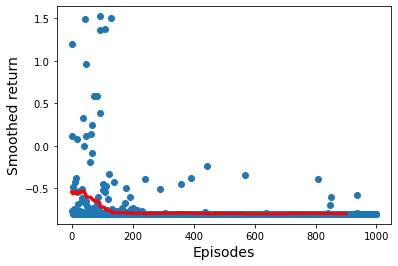

In [88]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(100), "valid")/100
plt.plot(smooth, color='red', lw=3)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()

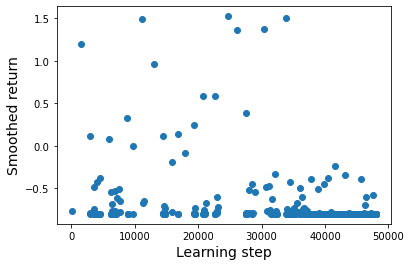

In [89]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

(1501, 15, 7, 3, 3)


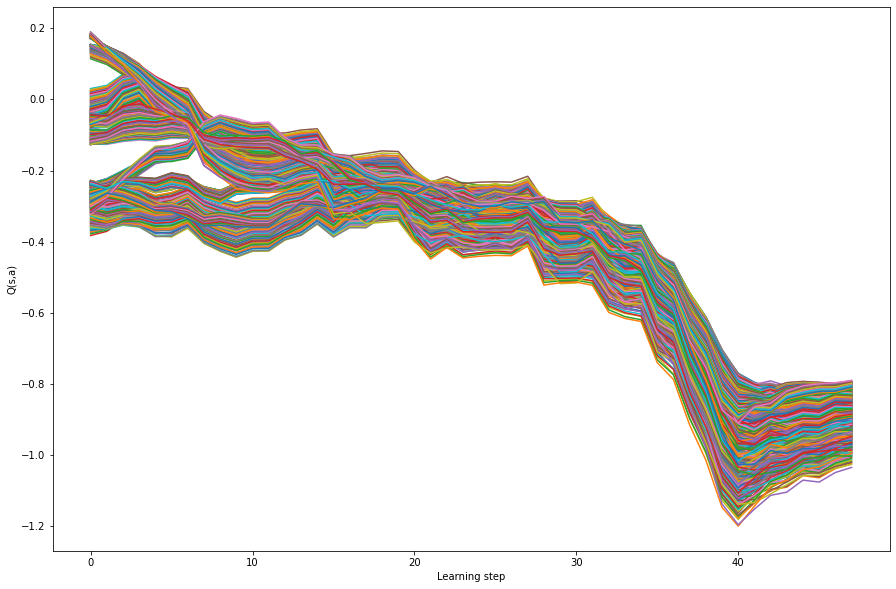

In [94]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
    plt.plot(Q_traj[:48,i])
plt.ylabel("Q(s,a)")
plt.xlabel("Learning step")
plt.savefig(data_dir+"quality_traj.png")
plt.show()

In [47]:
Q = np.load(data_dir+"best_quality.npy")
ind = np.argmax(Q_traj[4800])
np.unravel_index(ind, Q.shape)

(3, 0, 0, 2, 1)

[ 25.           0.          43.30127019]


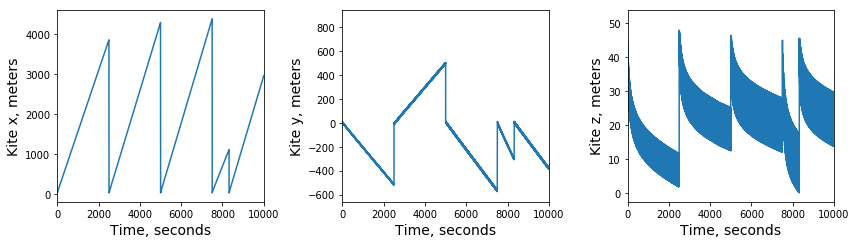

In [48]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

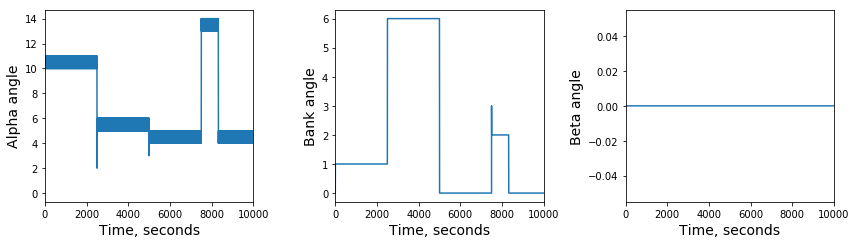

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

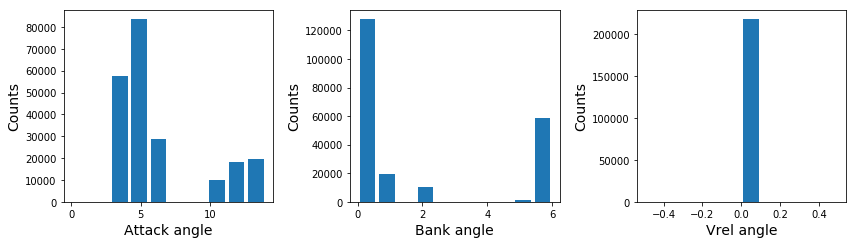

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()